## Import the Data

In [1]:
from netCDF4 import Dataset

import numpy as np
import xarray as xr
import pandas as pd
from matplotlib import pyplot

#data loaded and saved in EDA.ipynb
aq_monthly_df = xr.open_dataset("./data/aq_monthly_data.nc")


## Examine the Time Series Components, then run the ARIMA

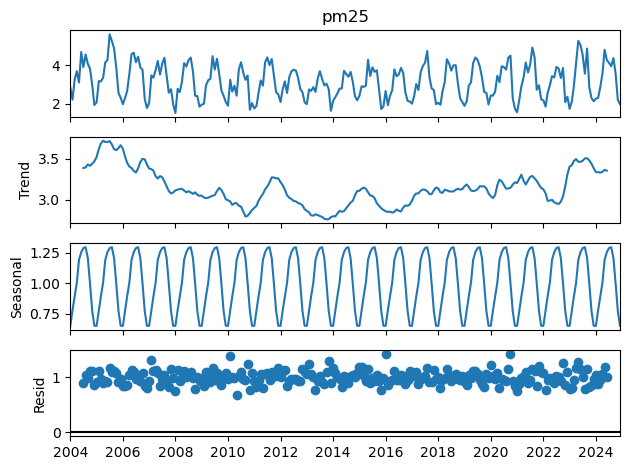

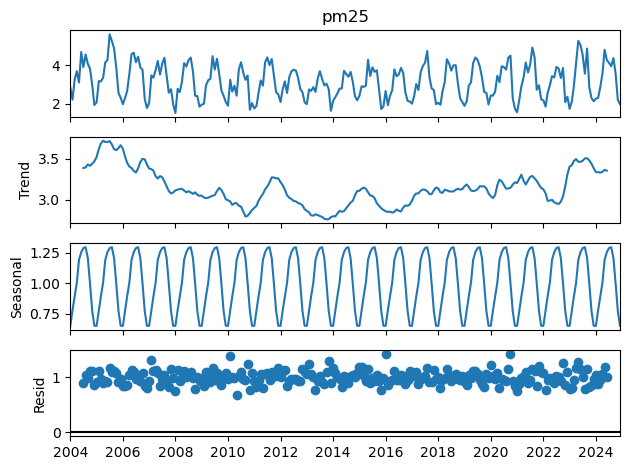

In [2]:
#time series analysis of air quality throughout year
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose 
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

#data = aq_monthly_df['pm25'].groupby('time.date').mean().to_dataframe().reset_index() convert to pandas dataframe
data = aq_monthly_df['pm25'].groupby('time.date').mean().to_pandas().asfreq('MS') #convert to pandas series
arima_data = data['2004-01-01':'2024-12-01']
# ETS Decomposition 
sd = seasonal_decompose(arima_data,model ='multiplicative') 
  
# ETS plot  
sd.plot() #uncomment if not using jupyter inline visualization

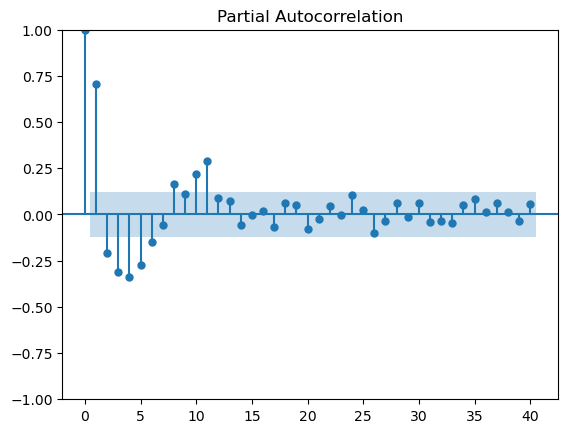

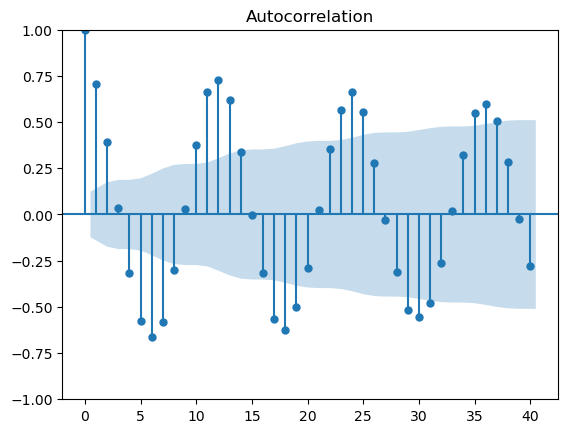

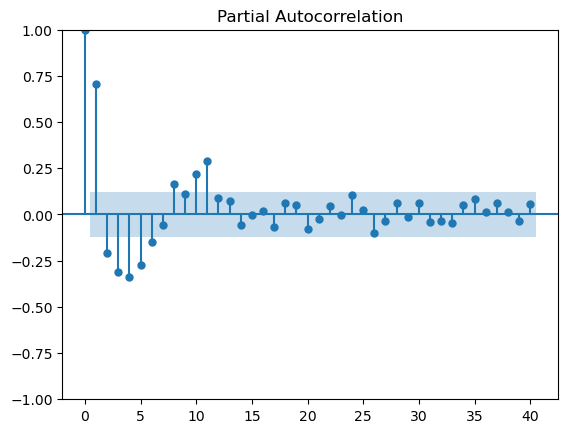

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(arima_data, lags=40)
plot_pacf(arima_data, lags=40)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

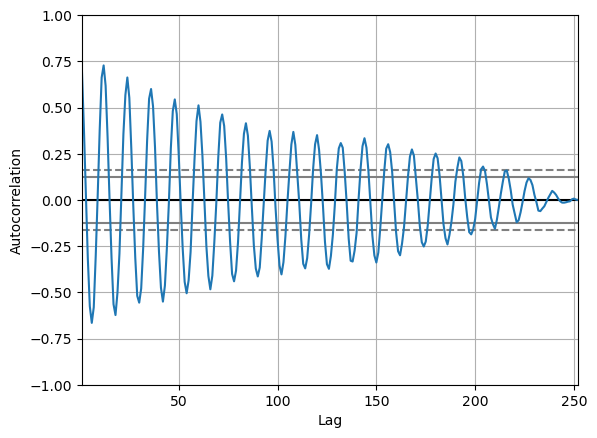

In [4]:
autocorrelation_plot(arima_data)
#pyplot.show()

In [5]:
arima_data_train = arima_data['2004-01-01':'2023-12-01']
arima_data_test = arima_data['2024-01-01':'2024-12-01']
model = auto_arima(arima_data_train,
                  seasonal=True,
                  m=12,  # Set the seasonal period - 12 for monthly data
                  trace=True,  # Print the search process
                  error_action='ignore',  # Ignore warnings
                  suppress_warnings=True) 

/Users/ben/anaconda3/envs/forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ben/anaconda3/envs/forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ben/anaconda3/envs/forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ben/anaconda3/envs/forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ben/anaconda3/envs/forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=365.990, Time=1.05 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=617.687, Time=0.03 sec


/Users/ben/anaconda3/envs/forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ben/anaconda3/envs/forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=408.217, Time=0.51 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=466.482, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1250.207, Time=0.01 sec


/Users/ben/anaconda3/envs/forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ben/anaconda3/envs/forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ben/anaconda3/envs/forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=344.771, Time=0.76 sec


/Users/ben/anaconda3/envs/forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=337.391, Time=0.39 sec


/Users/ben/anaconda3/envs/forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=420.510, Time=0.89 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=445.682, Time=0.09 sec


/Users/ben/anaconda3/envs/forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ben/anaconda3/envs/forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=406.132, Time=0.22 sec


/Users/ben/anaconda3/envs/forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[12] intercept   : AIC=399.045, Time=0.35 sec


/Users/ben/anaconda3/envs/forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,0)[12] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=452.901, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[12] intercept   : AIC=437.448, Time=0.11 sec


/Users/ben/anaconda3/envs/forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ben/anaconda3/envs/forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ben/anaconda3/envs/forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[12] intercept   : AIC=386.341, Time=0.22 sec


/Users/ben/anaconda3/envs/forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,3)(0,0,0)[12] intercept   : AIC=341.588, Time=0.35 sec
 ARIMA(2,0,2)(0,0,0)[12]             : AIC=492.990, Time=0.07 sec

Best model:  ARIMA(2,0,2)(0,0,0)[12] intercept
Total fit time: 5.597 seconds


/Users/ben/anaconda3/envs/forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [6]:
print(model.order)
print(model.seasonal_order)

(2, 0, 2)
(0, 0, 0, 12)


In [7]:
sarima_model = SARIMAX(arima_data, 
                       order=model.order, 
                       seasonal_order=model.seasonal_order)
sarima_model_fit = sarima_model.fit()

In [8]:
print(sarima_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   pm25   No. Observations:                  252
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -253.835
Date:                Sun, 02 Feb 2025   AIC                            517.670
Time:                        10:28:44   BIC                            535.317
Sample:                    01-01-2004   HQIC                           524.771
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2344      0.409      3.020      0.003       0.433       2.035
ar.L2         -0.2595      0.398     -0.653      0.514      -1.039       0.520
ma.L1         -0.2332      0.397     -0.587      0.5

<AxesSubplot:xlabel='date'>

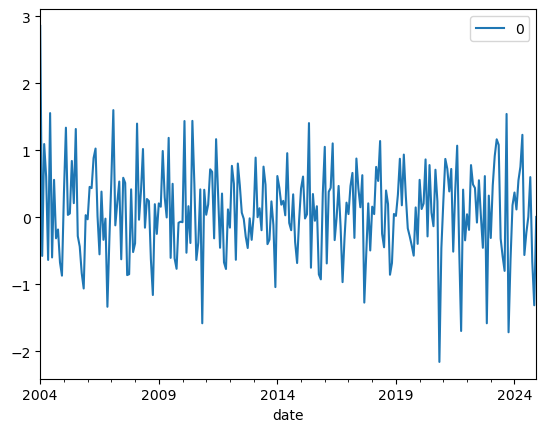

In [9]:
# line plot of residuals
residuals = pd.DataFrame(sarima_model_fit.resid)
residuals.plot()
#pyplot.show()

In [10]:
# summary stats of residuals
print(residuals.describe())

                0
count  252.000000
mean     0.092203
std      0.676695
min     -2.160554
25%     -0.342210
50%      0.092626
75%      0.499665
max      2.857236


## Comparing against FB Prophet

In [15]:
from datetime import datetime
import prophet
from sklearn.metrics import mean_absolute_error

aq_df = aq_monthly_df['pm25'].groupby('time.date').mean().to_dataframe().reset_index()
aq_df = aq_df.rename(columns={'date': 'ds', 'pm25': 'y'})

    #Prophet predictions
# create test dataset, remove last 12 months
train = aq_df.drop(aq_df.index[-12:])
# define the model
prophet_model = prophet.Prophet()
# fit the model
prophet_model.fit(train)
# define the period for which we want a prediction
dt_range = []
for i in range(1, 13):
	date = datetime(2024, i, 1)
	dt_range.append([date])
dt_range = pd.DataFrame(dt_range)
dt_range.columns = ['ds']
#dt_range['ds'] = to_datetime(dt_range['ds'])
# use the model to make a forecast
forecast = prophet_model.predict(dt_range)
# calculate MAE between expected and predicted values for december
y_true = aq_df['y'][-12:].values
y_pred_prophet = forecast['yhat'].values
mae_prophet = mean_absolute_error(y_true, y_pred_prophet)
print('Prophet MAE: %.3f' % mae_prophet)

sarima_predictions = sarima_model_fit.forecast(steps=12)
y_true = arima_data_test.values
y_pred_sarima = sarima_predictions.values
mae_sarima = mean_absolute_error(y_true, y_pred_sarima)
print('SARIMA MAE: %.3f' % mae_sarima)

10:31:57 - cmdstanpy - INFO - Chain [1] start processing
10:31:57 - cmdstanpy - INFO - Chain [1] done processing


Prophet MAE: 0.581
SARIMA MAE: 2.023
